In [1]:
from sklearn.datasets import make_blobs
%run k_means.py
from k_means import Cluster
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline



In [2]:
X, cluster_assignments = make_blobs(n_samples=700, centers=4,cluster_std=0.60, random_state=0)


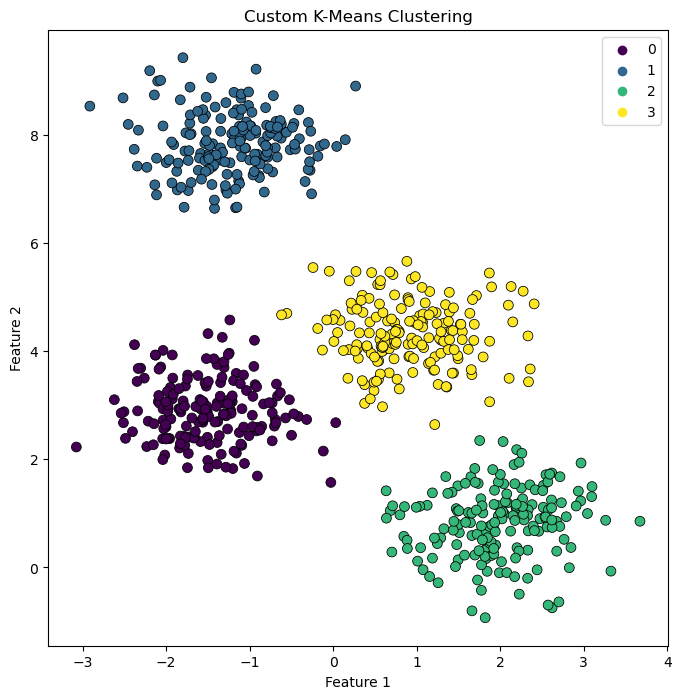

0.9961850080391301


In [3]:
#1.
from sklearn.metrics.cluster import adjusted_rand_score


c = Cluster(k_clusters=4)
labels, centroids = c.fit(X)

plt.figure(figsize=(8, 8))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='viridis', edgecolor='k', s=50)
plt.title('Custom K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

score = adjusted_rand_score(cluster_assignments, labels)
print(score)

# 0.996 is the score 
# Hypothesis correct



## Now with scikit learn


/Users/ashu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


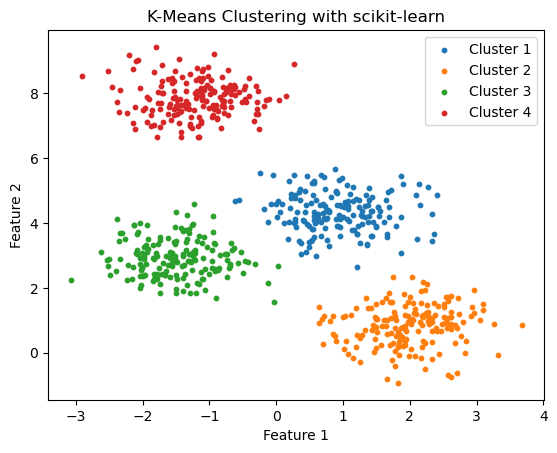

0.9961850080391301


In [4]:

#2.

np.random.seed(42)
X, cluster_assignments = make_blobs(n_samples=700, centers=4,cluster_std=0.60, random_state=0)

kmeans = KMeans(n_clusters=4)


kmeans.fit(X)

labels = kmeans.predict(X)

for i in range(4):  # Assuming 4 clusters
    cluster_points = X[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=10, label=f'Cluster {i + 1}')

plt.title('K-Means Clustering with scikit-learn')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

score = adjusted_rand_score(cluster_assignments, labels)
print(score)

# 0.996 is the score 
# Hypothesis correct.





In [5]:

#3.

## Comparison 
### On comparing the all the hypoothesis, we can see that the there are very few data points which are different in both the hypothesis. Its almost same.  The V measure score is coming out to be 0.996 which is very close and same for both the hypothesis.

# Q. Choose and run clustering algorithms

### MOPSI DATA below




In [6]:
# 1. The reason why you chose the clustering algorithm(s)
## Ans - I chose K-MEANS & DBSCAN clustering algorithm because it was more relevent and appropriate because of its density evaluation.

# 2. Any pre-processing of the data or any hyperparameter settings
## Ans - Null values were dropped as a part of preprocessing. Also the data type of Latitude was set from object to float.

# 3. Output from the algorithm(s) -- show what clusters were generated
## Ans - A few clusters were generated which showed the density/crowd of people in the city. 
## It represents the densly populated areas of the city.
## The yellow dots could represent school, Shopping complex or any highly crowded area.

# 4. The metrics you used to evaluate the output. What kind of performance did you get from that algorithm? Is that what you expected?
## Ans - If the silhouette score is close to 1, it suggests that the clusters are well-separated and each data point is assigned to the correct cluster.
### My silhouette score is 0.73 which is a good score. The algorithm performed well as expected. We can notice how the points on the right side are cloured seperately. We do see some overlapping especially near yellow and blue color.



##### K-Means Clustering



/Users/ashu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


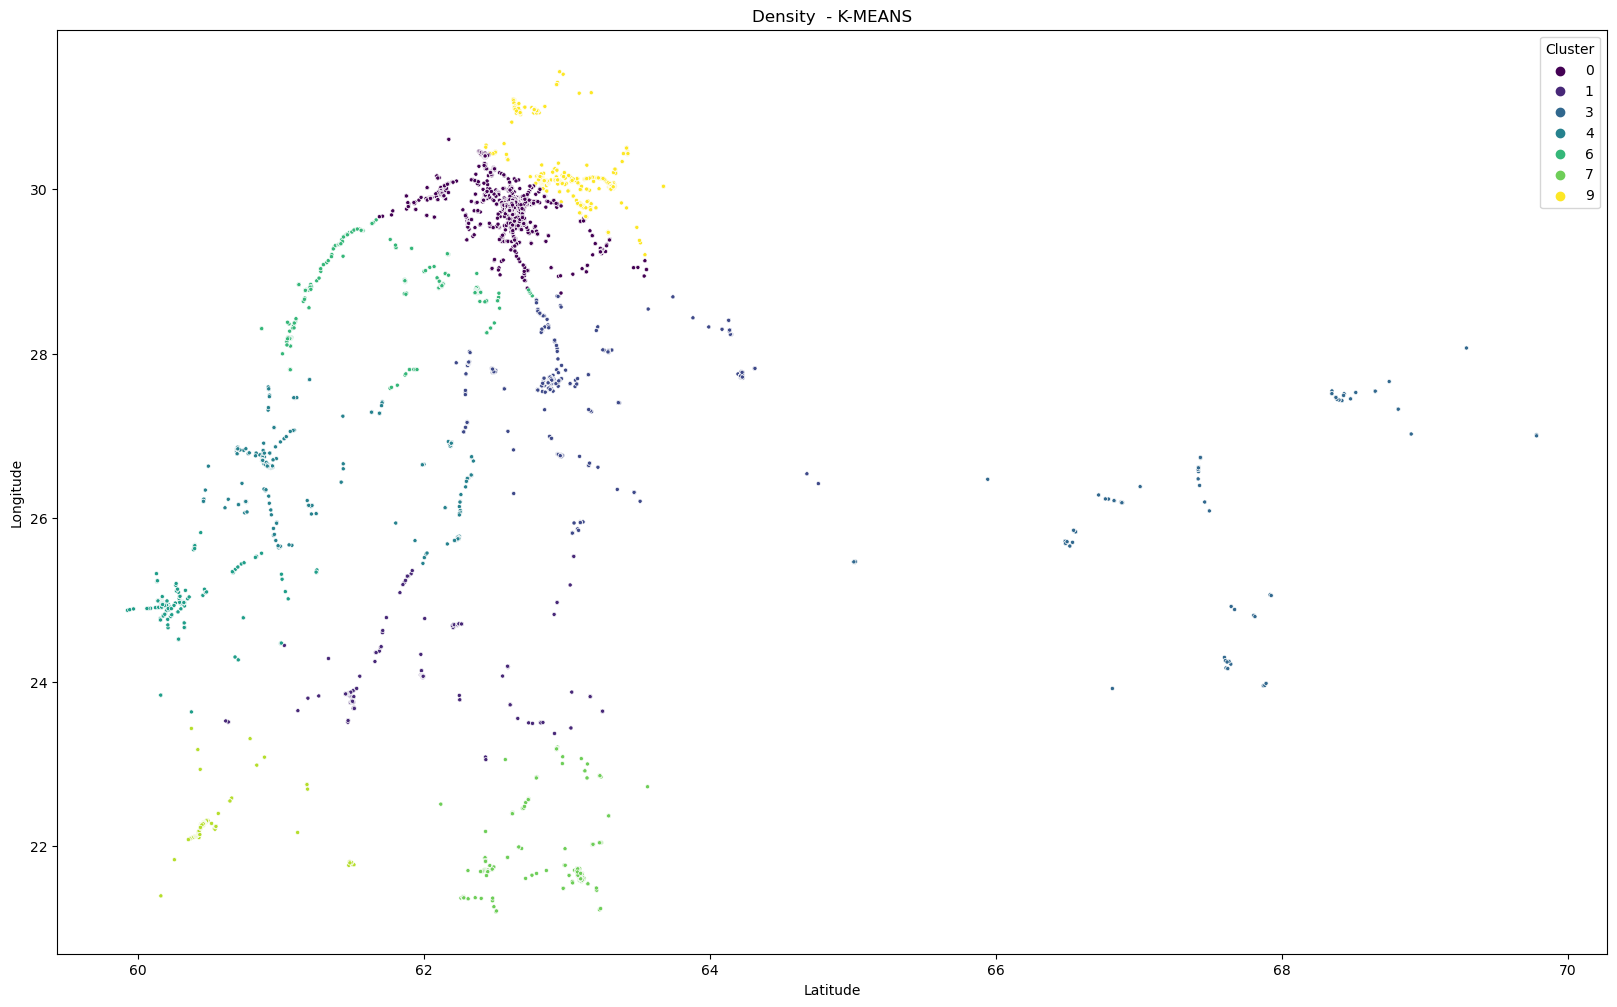

Silhouette Score: 0.7347878871794224


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv("mopsi.txt", sep='\t', header=None, names=['Latitude', 'Longitude'])
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')

df['Latitude'] = df['Latitude']/10000
df['Longitude'] = df['Longitude']/10000

df = df.dropna()

n_clusters = 10 
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Latitude', 'Longitude']])

plt.figure(figsize=(20, 12))
sns.scatterplot(data=df, x='Latitude', y='Longitude', hue='Cluster', palette='viridis', marker='.')
plt.title('Density  - K-MEANS')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

from sklearn.metrics import silhouette_score


# Calculate Silhouette Score
silhouette_avg = silhouette_score(df[['Latitude', 'Longitude']], df['Cluster'])
print("Silhouette Score:", silhouette_avg)



### DBSCAN below

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13467 entries, 0 to 13466
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   13466 non-null  float64
 1   Longitude  13466 non-null  float64
dtypes: float64(2)
memory usage: 210.6 KB


Text(0, 0.5, 'Longitude')

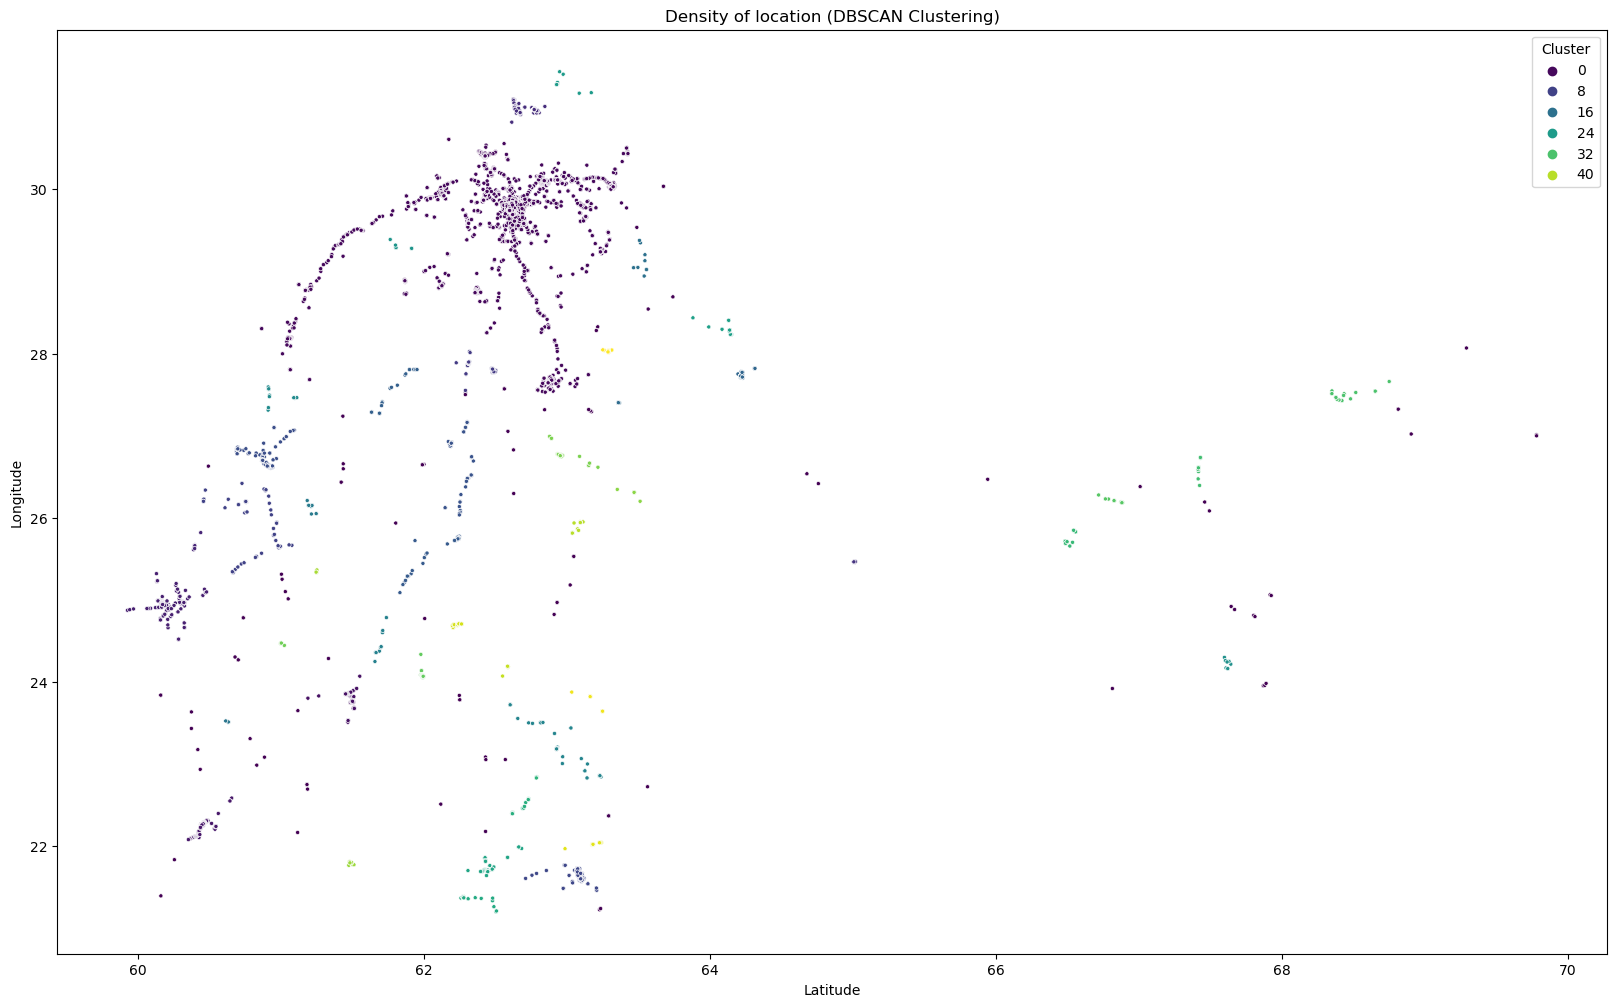

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

df = pd.read_csv("mopsi.txt", sep='\t', header=None, names=['Latitude', 'Longitude'])
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')

df['Latitude'] = df['Latitude']/10000
df['Longitude'] = df['Longitude']/10000

df.info()
df = df.dropna()


eps = 0.2
min_samples = 100
dbscan = DBSCAN(eps=eps, min_samples=5)
df['Cluster'] = dbscan.fit_predict(df[['Latitude', 'Longitude']])



df['Cluster'] = dbscan.fit_predict(df[['Latitude', 'Longitude']])

plt.figure(figsize=(20, 12))
sns.scatterplot(data=df, x='Latitude', y='Longitude', hue='Cluster', palette='viridis', marker='.')
plt.title('Density of location (DBSCAN Clustering)')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
# plt.show()

##However the seperation between the clusters is not accurate.




## Taxi trips Data set below




In [9]:
# 1. The reason why you chose the clustering algorithm(s)
## Ans - I chose K-MEANS & DBSCAN clustering algorithm because it was more relevent and appropriate because of its density evaluation.
    #    I didnt choose hierarchical because of the data representation limitation.

# 2. Any pre-processing of the data or any hyperparameter settings
## Ans - Null values were dropped as a part of preprocessing. 

# 3. Output from the algorithm(s) -- show what clusters were generated
## Ans - A few clusters were generated which showed the dense pickup & dropoff points in their respective plots.
## It represents the higher active areas especialy towns including airports or offices.

# 4. The metrics you used to evaluate the output. What kind of performance did you get from that algorithm? Is that what you expected?
### silhouette_score came out to be 0.669549722878715. It did pretty well although we see a more descent segregation in DBSCAN depending upon the density of the points. The output of the DBSCAN is what i nearly expected.


/Users/ashu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


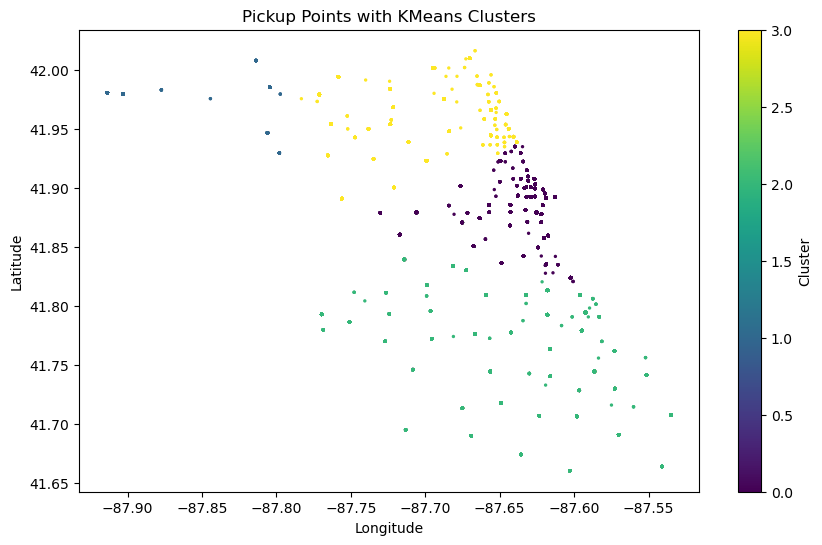

Number of clusters: 4
0    55099
1    16420
3    12728
2    11410
Name: Cluster, dtype: int64
Silhouette Score: 0.669549722878715
<class 'pandas.core.frame.DataFrame'>
Int64Index: 95657 entries, 0 to 101786
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Pickup Centroid Latitude   95657 non-null  float64
 1   Pickup Centroid Longitude  95657 non-null  float64
 2   Cluster                    95657 non-null  int32  
dtypes: float64(2), int32(1)
memory usage: 2.6 MB


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

df = pd.read_csv("Taxi_Trips__2013-2023_.csv")

df_subset = df[["Pickup Centroid Latitude", "Pickup Centroid Longitude"]]
df_subset_cleaned = df_subset.dropna()

df_subset_cleaned = df_subset_cleaned.astype(float)

n_clusters = 4  
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_subset_cleaned['Cluster'] = kmeans.fit_predict(df_subset_cleaned[['Pickup Centroid Latitude', 'Pickup Centroid Longitude']])

plt.figure(figsize=(10, 6))
plt.scatter(df_subset_cleaned["Pickup Centroid Longitude"], df_subset_cleaned["Pickup Centroid Latitude"], c=df_subset_cleaned['Cluster'], cmap='viridis', s=2)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Pickup Points with KMeans Clusters')
plt.colorbar(label='Cluster')
plt.show()

print("Number of clusters:", n_clusters)
print(df_subset_cleaned['Cluster'].value_counts())

silhouette_avg = silhouette_score(df_subset_cleaned[['Pickup Centroid Latitude', 'Pickup Centroid Longitude']], df_subset_cleaned['Cluster'])
print("Silhouette Score:", silhouette_avg)

df_subset_cleaned.info()


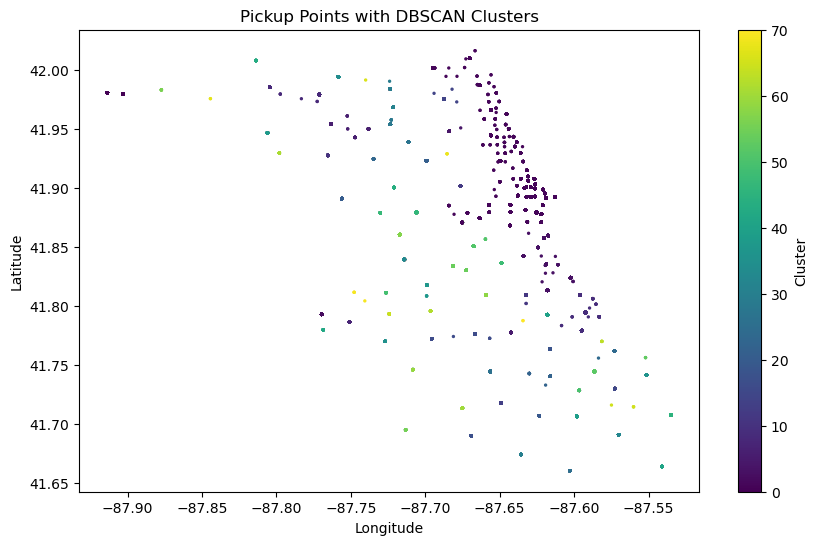

Number of clusters: 71
1     58926
0     15998
3      4097
2      1860
9      1668
      ...  
68        3
53        3
67        2
70        2
66        1
Name: Cluster, Length: 71, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 95657 entries, 0 to 101786
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Pickup Centroid Latitude   95657 non-null  float64
 1   Pickup Centroid Longitude  95657 non-null  float64
 2   Cluster                    95657 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 2.9 MB


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("Taxi_Trips__2013-2023_.csv")

df_subset = df[["Pickup Centroid Latitude", "Pickup Centroid Longitude"]]
df_subset_cleaned = df_subset.dropna()

df_subset_cleaned = df_subset_cleaned.astype(float)

scaler = StandardScaler()
df_subset_scaled = scaler.fit_transform(df_subset_cleaned)

eps = 0.15  
min_samples =   1
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
df_subset_cleaned['Cluster'] = dbscan.fit_predict(df_subset_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(df_subset_cleaned["Pickup Centroid Longitude"], df_subset_cleaned["Pickup Centroid Latitude"], c=df_subset_cleaned['Cluster'], cmap='viridis', s=2)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Pickup Points with DBSCAN Clusters')
plt.colorbar(label='Cluster')
plt.show()

unique_clusters = df_subset_cleaned['Cluster'].unique()
num_clusters = len(unique_clusters) - 1 if -1 in unique_clusters else len(unique_clusters)
print("Number of clusters:", num_clusters)
print(df_subset_cleaned['Cluster'].value_counts())

df_subset_cleaned.info()



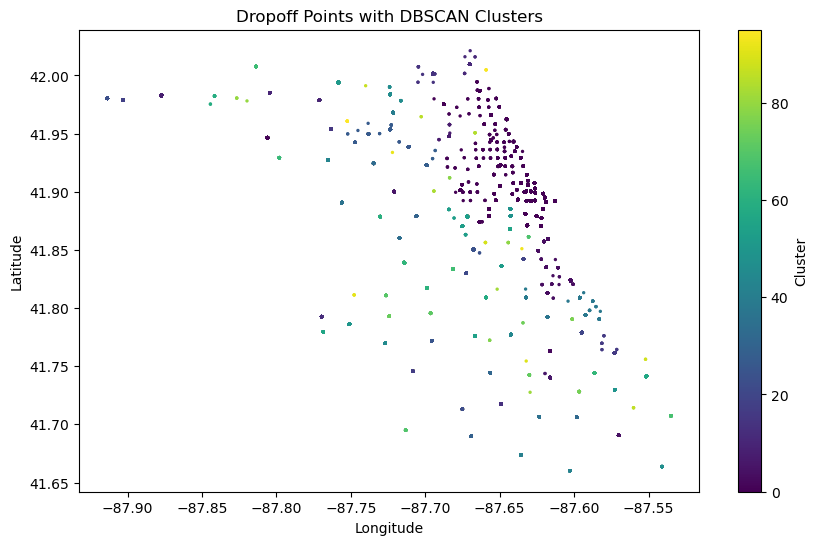

Number of clusters: 96
0     60377
3      4730
48     3452
18     2029
23     1651
      ...  
90        1
82        1
92        1
93        1
81        1
Name: Cluster, Length: 96, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 92489 entries, 1 to 101786
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Dropoff Centroid Latitude   92489 non-null  float64
 1   Dropoff Centroid Longitude  92489 non-null  float64
 2   Cluster                     92489 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 2.8 MB


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("Taxi_Trips__2013-2023_.csv")

df_subset = df[["Dropoff Centroid Latitude", "Dropoff Centroid Longitude"]]
df_subset_cleaned = df_subset.dropna()

df_subset_cleaned = df_subset_cleaned.astype(float)

scaler = StandardScaler()
df_subset_scaled = scaler.fit_transform(df_subset_cleaned)

eps = 0.15  
min_samples = 1 
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
df_subset_cleaned['Cluster'] = dbscan.fit_predict(df_subset_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(df_subset_cleaned["Dropoff Centroid Longitude"], df_subset_cleaned["Dropoff Centroid Latitude"], c=df_subset_cleaned['Cluster'], cmap='viridis', s=2)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Dropoff Points with DBSCAN Clusters')
plt.colorbar(label='Cluster')
plt.show()

unique_clusters = df_subset_cleaned['Cluster'].unique()
num_clusters = len(unique_clusters) - 1 if -1 in unique_clusters else len(unique_clusters)
print("Number of clusters:", num_clusters)
print(df_subset_cleaned['Cluster'].value_counts())

df_subset_cleaned.info()


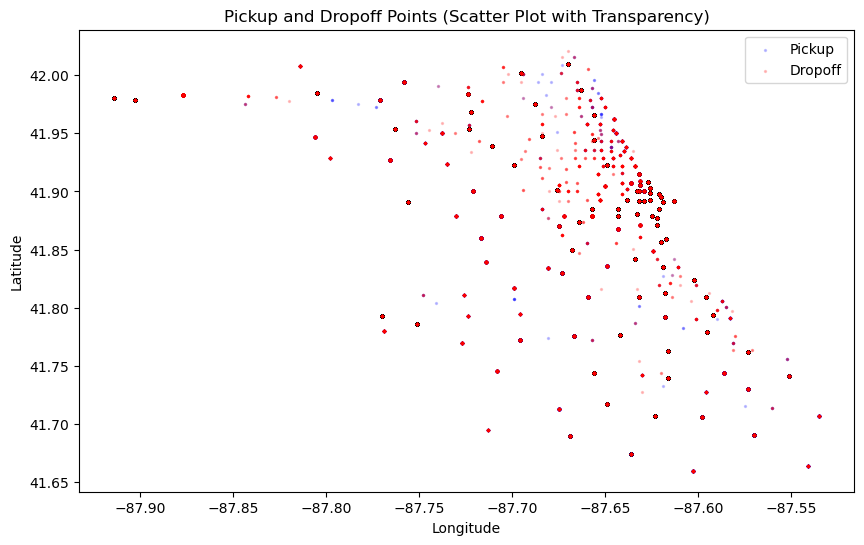

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Taxi_Trips__2013-2023_.csv")

df_subset = df[["Pickup Centroid Latitude", "Pickup Centroid Longitude", "Dropoff Centroid Latitude", "Dropoff Centroid Longitude"]]

df_subset_cleaned = df_subset.dropna()
df_subset_cleaned = df_subset_cleaned.astype(float)

df_subset_cleaned = df_subset_cleaned.round(3)

plt.figure(figsize=(10, 6))
plt.scatter(df_subset_cleaned["Pickup Centroid Longitude"], df_subset_cleaned["Pickup Centroid Latitude"], color='blue', label='Pickup', s=2, alpha=0.2)
plt.scatter(df_subset_cleaned["Dropoff Centroid Longitude"], df_subset_cleaned["Dropoff Centroid Latitude"], color='red', label='Dropoff', s=2, alpha=0.2)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Pickup and Dropoff Points (Scatter Plot with Transparency)')
plt.legend()

plt.show()




# FOR VERIFICATION of density




# EXTENDED K-MEANS below

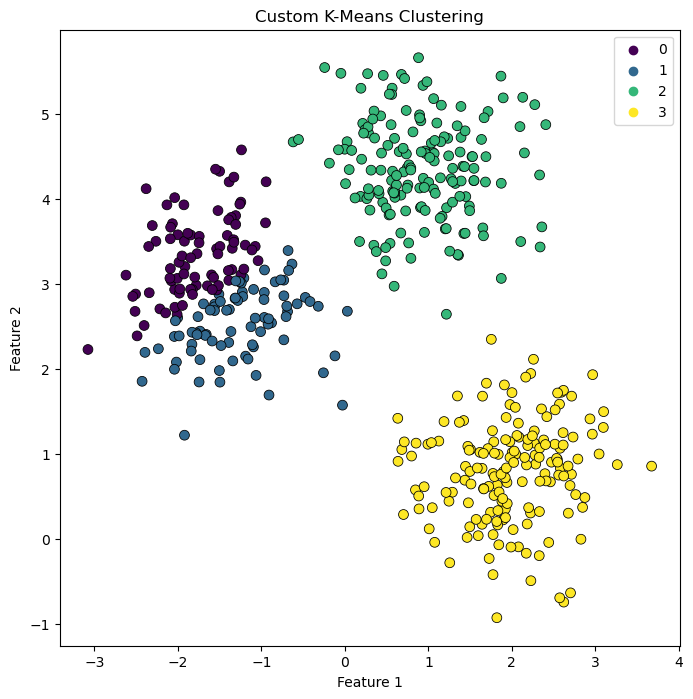

Counter({2: 167, 3: 167, 0: 83, 1: 83})
Adjusted Rand Score: 0.8700639973950179


In [14]:

from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.datasets import make_blobs
from collections import Counter
%run k_means.py
import matplotlib.pyplot as plt
import seaborn as sns


X, cluster_assignments = make_blobs(n_samples=500, centers=3, cluster_std=0.60, random_state=0)

c = Cluster(k_clusters=4, balanced=False)  # Regular K-MEANS
labels, centroids = c.fit(X)

plt.figure(figsize=(8, 8))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='viridis', edgecolor='k', s=50)
plt.title('Custom K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

print(Counter(labels))

score = adjusted_rand_score(cluster_assignments, labels)
print("Adjusted Rand Score:", score)


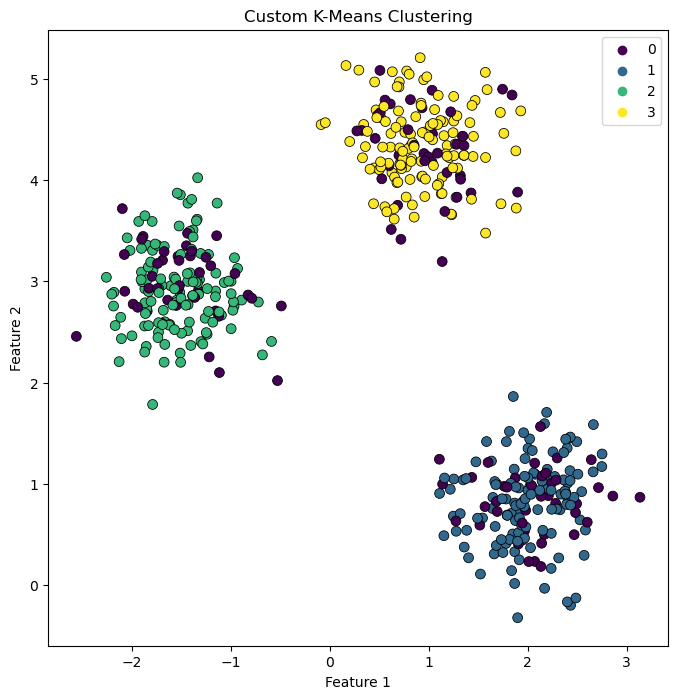

Counter({0: 125, 2: 125, 3: 125, 1: 125})
Adjusted Rand Score: 0.5980745856886539


In [20]:

from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.datasets import make_blobs
from collections import Counter
%run k_means.py
import matplotlib.pyplot as plt
import seaborn as sns


X, cluster_assignments = make_blobs(n_samples=500, centers=3, cluster_std=0.40, random_state=0)

c = Cluster(k_clusters=4, balanced=True) # BALANCED K-MEANS
labels, centroids = c.fit(X)

plt.figure(figsize=(8, 8))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='viridis', edgecolor='k', s=50)
plt.title('Custom K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

print(Counter(labels))

score = adjusted_rand_score(cluster_assignments, labels)
print("Adjusted Rand Score:", score)
